In [1]:
import pandas as pd

# Common Windows encoding
df = pd.read_csv(r"C:\Users\rache\Helen-and-Rachel-Data-Science-\dataset.csv", encoding="cp1252")

# first need to subset
counties = ["Los Angeles", "San Diego", "Orange", "Riverside", "San Bernardino"]

subset_df = df[df["County"].isin(counties)]

# get rid of the 30-day (done)
# remove location column (done)
# print unique types in hospital rating and see how many unique types, convert to like three of four (there is already three so this looks good)
# do something with the e's 

In [2]:
print(subset_df.head())

         Year       County                   Hospital    OSHPDID  \
92  2011-2012  Los Angeles          Alhambra Hospital  106190017   
93  2011-2012  Los Angeles          Alhambra Hospital  106190017   
94  2011-2012  Los Angeles   Antelope Valley Hospital  106190034   
95  2011-2012  Los Angeles   Antelope Valley Hospital  106190034   
96  2011-2012  Los Angeles  Saint Mary Medical Center  106190053   

               Measure  Risk Adjusted Rate  # of Deaths/Readmissions  \
92  30-day Readmission               10.40                      12.0   
93    30-day Mortality                4.63                       5.0   
94  30-day Readmission               14.61                      61.0   
95    30-day Mortality               12.32                      41.0   
96  30-day Readmission               11.55                      26.0   

    # of Cases Hospital Ratings                  Location 1  
92        96.0      As Expected       (34.08988, -118.1449)  
93       100.0      As Expected   

In [3]:
# Cleaning the Data

subset_df.loc[:, 'Measure'] = subset_df['Measure'].str.replace('30-day ', '')

subset_df.loc[:, '# of Cases'] = pd.to_numeric(subset_df['# of Cases'], errors='coerce')
subset_df.loc[:, '# of Deaths/Readmissions'] = pd.to_numeric(subset_df['# of Deaths/Readmissions'], errors='coerce')

In [4]:
import numpy as np 

subset_df.head()

,Year,County,Hospital,OSHPDID,Measure,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases,Hospital Ratings,Location 1
92,2011-2012,Los Angeles,Alhambra Hospital,106190017,Readmission,10.40,12.0,96.0,As Expected,"(34.08988, -118.1449)"
93,2011-2012,Los Angeles,Alhambra Hospital,106190017,Mortality,4.63,5.0,100.0,As Expected,"(34.08988, -118.1449)"
94,2011-2012,Los Angeles,Antelope Valley Hospital,106190034,Readmission,14.61,61.0,414.0,As Expected,"(34.68928, -118.15767)"
95,2011-2012,Los Angeles,Antelope Valley Hospital,106190034,Mortality,12.32,41.0,431.0,As Expected,"(34.68928, -118.15767)"
96,2011-2012,Los Angeles,Saint Mary Medical Center,106190053,Readmission,11.55,26.0,189.0,As Expected,"(33.7802376, -118.1866412)"


In [5]:
subset_df=subset_df.loc[:, ['Year','County', 'Hospital','OSHPDID','Measure','Risk Adjusted Rate','# of Deaths/Readmissions','# of Cases','Hospital Ratings']]

In [6]:
subset_df['Hospital Ratings'].unique()

array(['As Expected', 'Worse', 'Better', nan], dtype=object)

In [7]:
subset_df['Start'] = subset_df['Year'].str.split('-').str[0]
subset_df['Year']=subset_df['Start']
subset_df = subset_df.drop('Start',axis=1)

subset_df['Year'] = pd.to_numeric(subset_df['Year'], errors='coerce')
subset_df.head()

,Year,County,Hospital,OSHPDID,Measure,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases,Hospital Ratings
92,2011,Los Angeles,Alhambra Hospital,106190017,Readmission,10.40,12.0,96.0,As Expected
93,2011,Los Angeles,Alhambra Hospital,106190017,Mortality,4.63,5.0,100.0,As Expected
94,2011,Los Angeles,Antelope Valley Hospital,106190034,Readmission,14.61,61.0,414.0,As Expected
95,2011,Los Angeles,Antelope Valley Hospital,106190034,Mortality,12.32,41.0,431.0,As Expected
96,2011,Los Angeles,Saint Mary Medical Center,106190053,Readmission,11.55,26.0,189.0,As Expected


In [8]:
subset_df.dtypes


Year                          int64
County                       object
Hospital                     object
OSHPDID                      object
Measure                      object
Risk Adjusted Rate          float64
# of Deaths/Readmissions    float64
# of Cases                  float64
Hospital Ratings             object
dtype: object

In [10]:
subset_df.describe()
subset_df.shape

(1026, 9)

In [11]:
subset_df.describe()

,Year,Risk Adjusted Rate,# of Deaths/Readmissions,# of Cases
count,1026.000000,1023.000000,1023.000000,1023.000000
mean,2012.475634,11.310323,95.058651,213.074291
std,1.113943,3.763209,153.413644,197.595166
min,2011.000000,0.000000,0.000000,1.000000
25%,2011.000000,9.065000,15.000000,51.000000
50%,2012.000000,11.440000,37.000000,149.000000
75%,2013.000000,13.685000,73.500000,344.500000
max,2014.000000,27.650000,969.000000,887.000000


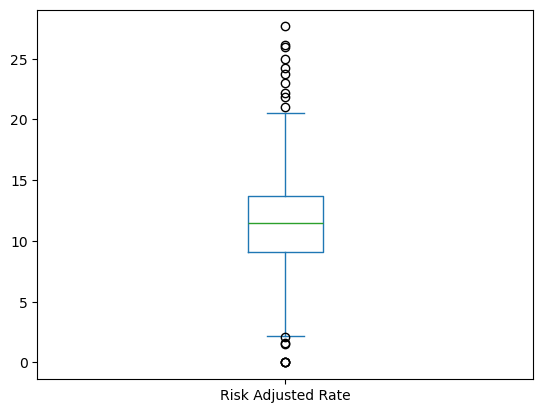

In [12]:
import matplotlib.pyplot as plt

subset_df['Risk Adjusted Rate'].plot(kind='box')
plt.show()


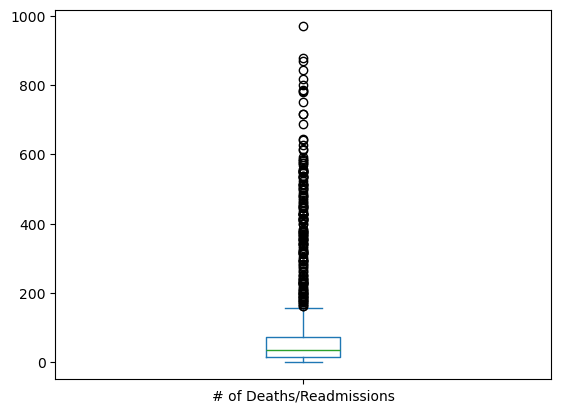

In [14]:
subset_df['# of Deaths/Readmissions'].plot(kind='box')
plt.show()


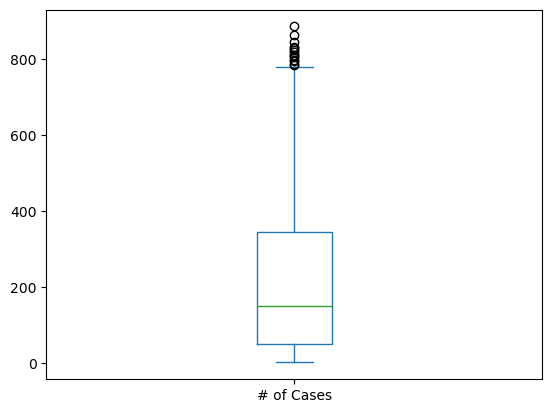

In [15]:
subset_df['# of Cases'].plot(kind='box')
plt.show()
